<h1>Credit Card Churn Prediction</h1>

<p>THe project presented here is to take credit card demographics and usage data to predict which customers will remain or close their accounts.  The business term for customers who close their accounts is called churn, hence the name of the project and data set.  The purpose of this study will be to do our best to predict churning customers so the credit card company can come up with an action or promotion to keep them as customers.  A good model will ensure customers who are likely to churn get an offer to incentivise them to stay.  At the same time we would like to reduce to cost of offering these perks to everybody since most cumsomers will remain loyal and not need to be incentivised.</p>

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

import seaborn as sns
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_csv('BankChurners.csv')
y = df['Attrition_Flag'].to_numpy()
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<h1>EDA</h1>

<p>Our dataframe consists of 23 columns.  For our analysis we will not use 3 of them, the client number which is just an id number.  The other two were created by the person who compiled this data for their calculations, I will not use them. We have a total of 10,127 rows.</p>

<p>As for the columns we will use, we have one column to predict, it is labeled Attrition_Flag.  For our data columns we have 14 numerical and 5 categorical.  The analysis will go over numerical and categorical columns separately.  For the numerical we will start with univariate analysis consisting of simple histograms to get a feel for what the data is like.  Then we will have a bivariate analysis investigating is a column of chosing has a statistically significant relationship with our attrited customers.  Finally for our numerical variables we will show a multivariate analysis consisting of a correlation heatmap.</p>

<p>For our categorical variables such as Marital_Status  we will look at some countplots for univariate analysis to understand what our data looks like.  I will follow that with a bivariate analysis of selected columns using a Pearson Chi-Squared test for statistical significance.</p>

In [19]:
categorical = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numerical = ['Customer_Age', 'Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

<h5>Numerical Data Columns - Univariate Analysis</h5>

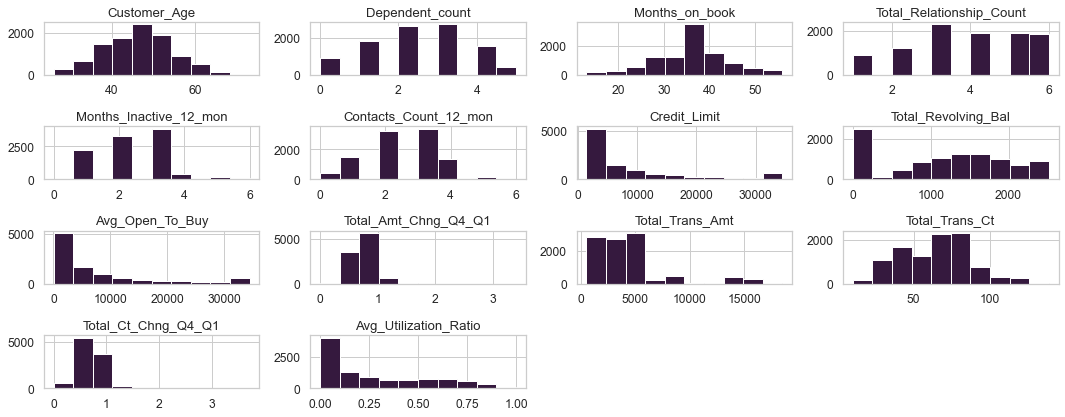

In [20]:
sns.set(style='whitegrid',palette='rocket',font_scale=1.1, rc={'figure.figsize': [8,5]})

tr = df[numerical].hist(figsize=(15,6))
plt.tight_layout()
plt.show()

<h5>Numerical Data Columns - Bivariate Analysis</h5>

<p>I will look at two variables, Customer Age and Total Relationship Count.</p>

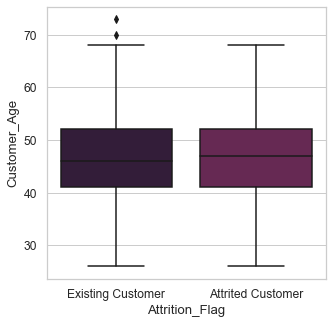

In [21]:
# Customer Age
fig = plt.figure(figsize=(5,5)) 
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.show()

In [22]:
df[['Attrition_Flag', 'Customer_Age']].groupby(['Attrition_Flag'], as_index=False).mean().sort_values(by='Customer_Age', ascending=False)

,Attrition_Flag,Customer_Age
0,Attrited Customer,46.659496
1,Existing Customer,46.262118


<h6>Hypothesis Test for relationship between customer age and attrition</h6>

<p>Null Hypothesis - There is no difference in customer age for attrited customers and existing customers</p>
<p>Alternative Hypothesis - There is a difference in customer age for attrited customers and existing customers</p>

In [23]:
df_temp = df[(np.abs(stats.zscore(df["Customer_Age"])) < 3)] 

existing = df_temp[df_temp['Attrition_Flag'] == 'Existing Customer']['Customer_Age']
attrited = df_temp[df_temp['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']

existing = existing.values.tolist()
existing = random.sample(existing, 100)
attrited = attrited.values.tolist()
attrited = random.sample(attrited, 100)

ttest, pval = ttest_ind(existing, attrited, equal_var=False)
print('ttest', ttest)
print('p value', pval)

if pval <0.05:
    print("we reject null hypothesis")
    print('This feature should be important in determining customer attrition')
else:
    print("we accept null hypothesis")
    print('This feature should NOT be important in determining customer attrition')

ttest -0.21839679887468363
p value 0.8273450619454393
we accept null hypothesis
This feature should NOT be important in determining customer attrition


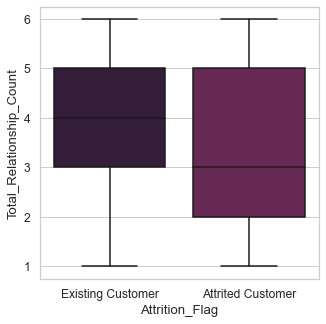

In [24]:
# Total Relationship Count
fig = plt.figure(figsize=(5,5)) 
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)
plt.show()

In [25]:
df[['Attrition_Flag', 'Total_Relationship_Count']].groupby(['Attrition_Flag'], as_index=False).mean().sort_values(by='Total_Relationship_Count', ascending=False)

,Attrition_Flag,Total_Relationship_Count
1,Existing Customer,3.914588
0,Attrited Customer,3.279656


<h6>Hypothesis Test for relationshop between customer relationship count and attrition</h6>

<p>Null Hypothesis - There is no difference in relationship count for attrited customers and existing customers</p>
<p>Alternative Hypothesis - There is a difference in relationship count for attrited customers and existing customers</p>

In [26]:
df_temp = df[(np.abs(stats.zscore(df['Total_Relationship_Count'])) < 3)] 

existing = df_temp[df_temp['Attrition_Flag'] == 'Existing Customer']['Total_Relationship_Count']
attrited = df_temp[df_temp['Attrition_Flag'] == 'Attrited Customer']['Total_Relationship_Count']

existing = existing.values.tolist()
existing = random.sample(existing, 100)
attrited = attrited.values.tolist()
attrited = random.sample(attrited, 100)

ttest, pval = ttest_ind(existing, attrited, equal_var=False)
print('ttest', ttest)
print('p value', pval)

if pval <0.05:
    print("we reject null hypothesis")
    print('This feature should be important in determining customer attrition')
else:
    print("we accept null hypothesis")
    print('This feature should NOT be important in determining customer attrition')

ttest 2.465477977159364
p value 0.014535074360711603
we reject null hypothesis
This feature should be important in determining customer attrition


<p>This shows total relationship count is of importance when considering customer attrition.  Age on the other hand is not as important to our prediction.  We may do this with all the numerical variables but for this exercise I wanted to show how the hypothesis test works.</p>

<h5>Numerical Data Columns - Multivariate Analysis</h5>

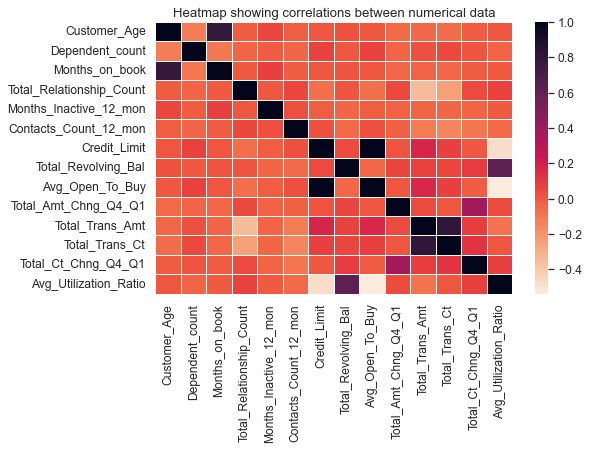

In [27]:
sns.heatmap(df[numerical].corr(),annot=False,linewidths=.5, cmap="rocket_r")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

<p>There are some highly correlated values in the heatmap above.  One pair is credit limit and average open to buy.  The average open to buy is how much money the customer can charge at any time.  The correlation coefficient for these variables is 1.  The causation for the correlation would be that customers who have high open to buy will be given higher credit limits to encourage spending.  I will remove the open to buy column since it is just confusing and does not add much information.</p>
<p>The other columns with high correlation are transaction amount and transaction count.  I will keep these in since there may be information that is useful such as certain customers only use their card for large purchases.  The correlation coefficient is 0.8 so it is not as solid as the previous correlation.</p>

<h5>Categorical Data Columns - Univariate Analysis</h5>

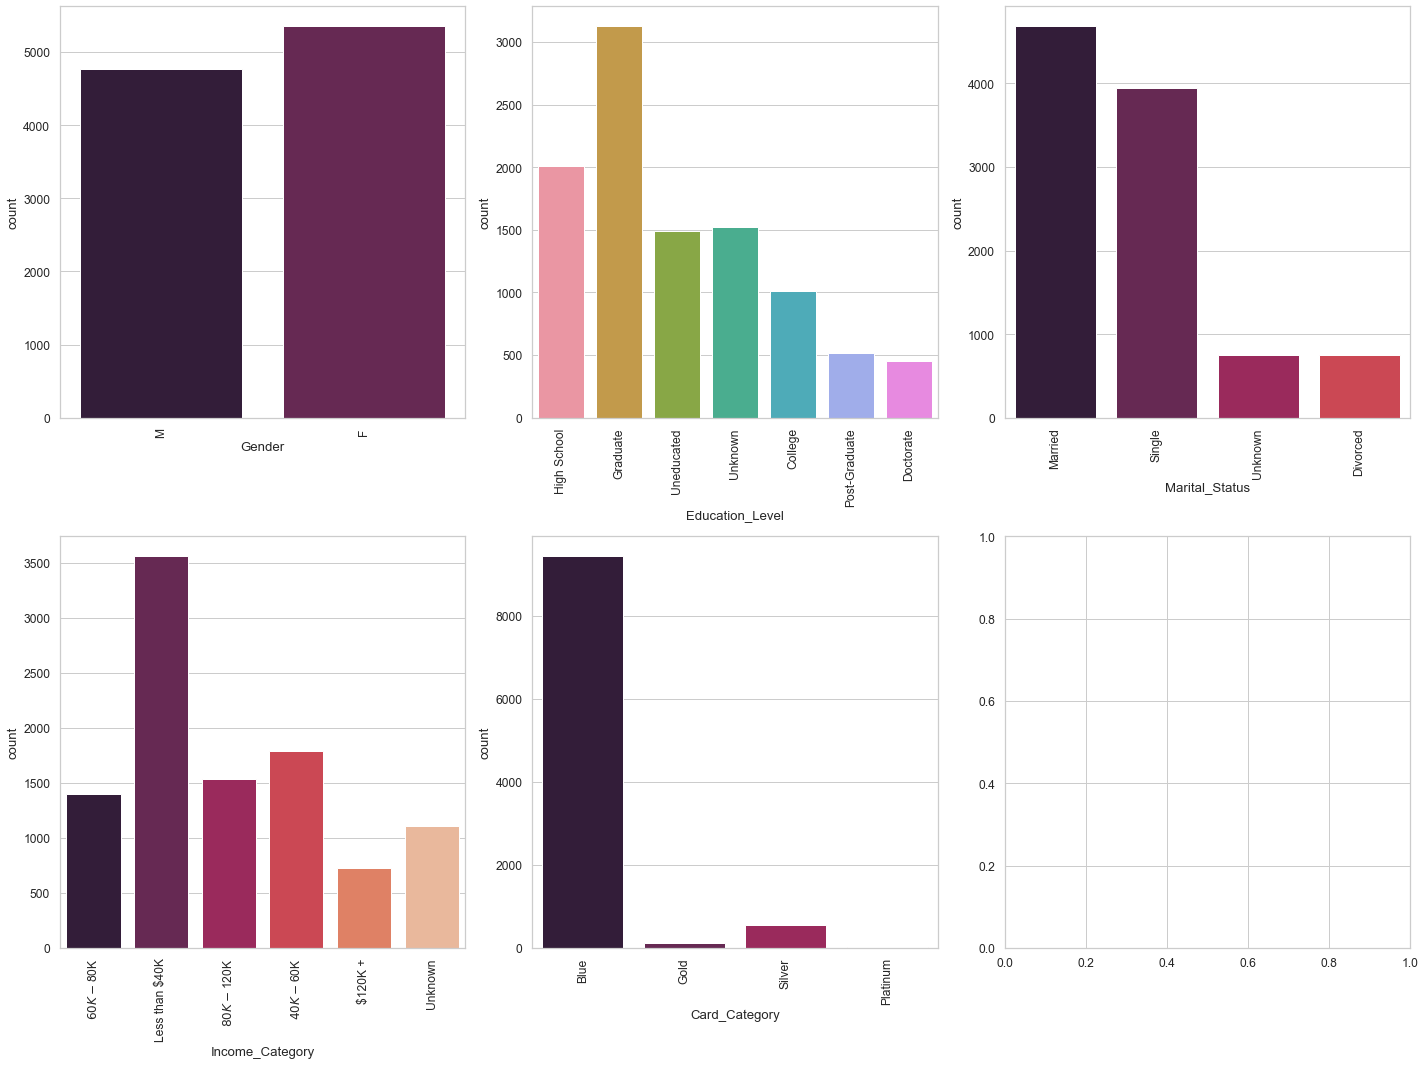

In [28]:
fig, ax = plt.subplots(2,3,figsize=(20,15))

for variable, subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

<h5>Categorical Data Columns - Bivariate Analysis</h5>

<p>Here we will do the same as above but we will use a Pearson chi squared test as opposed to the standard t-test.  I will investigate a few which may have influence: marital status, income category, card category</p>

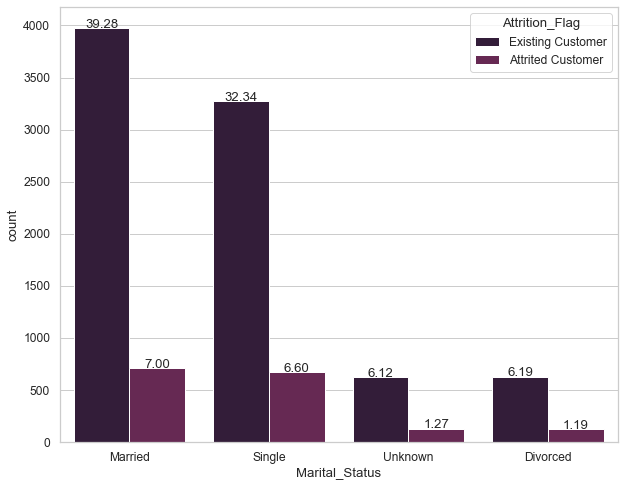

In [29]:
plt.figure(figsize=(10,8))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Marital_Status', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [30]:
# contingency table
c_t = pd.crosstab(df['Marital_Status'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,2,4
Married,5,42
Single,5,38
Unknown,2,3


<p>This table is to determine whether variables are contingent one each other.  Does customer attrition depend on marital status or are they independent?  Hard to tell from table, we will use a Pearson Chi-Squared test.</p>

<h3>Hypothesis Test for relationship between marital status and attrition</h3>

<p>Null Hypothesis - There is no relationship between marital status and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between marital status and customer attrition</p>

In [31]:
stat, p, dof, expected = chi2_contingency(c_t)
# print('dof=%d' % dof)
# print('p_value', p)
# print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
    print('Customer attrition depends on marital status.')
else:
    print('Independent - Accept Null Hypothesis')
    print('Customer attrition does NOT depend on marital status.')

probability=0.950, critical=7.815, stat=5.355
Independent - Accept Null Hypothesis
Customer attrition does NOT depend on marital status.


<h6>Education Level</h6>

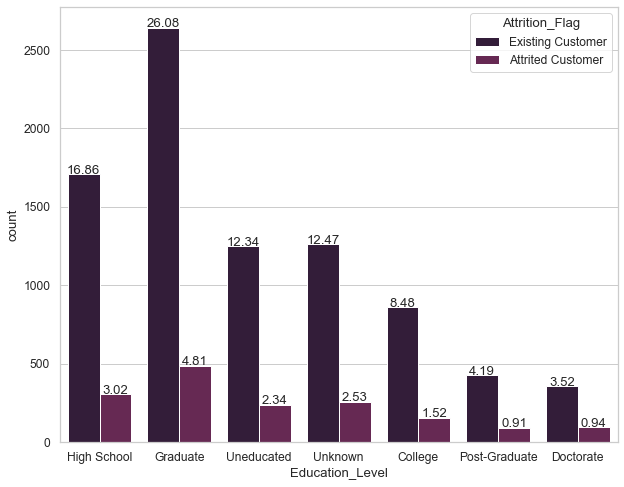

In [32]:
plt.figure(figsize=(10,8))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Education_Level', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [33]:
# contingency table
c_t = pd.crosstab(df['Education_Level'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,2,16
Doctorate,0,7
Graduate,3,21
High School,1,17
Post-Graduate,1,2
Uneducated,1,7
Unknown,6,17


<h3>Hypothesis Test for relationship between education level and attrition</h3>

<p>Null Hypothesis - There is no relationship between education level and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between education level and customer attrition</p>

In [34]:
stat, p, dof, expected = chi2_contingency(c_t)
# print('dof=%d' % dof)
# print('p_value', p)
# print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
    print('Customer attrition depends on education level.')
else:
    print('Independent - Accept Null Hypothesis')
    print('Customer attrition does NOT depend on education level.')

probability=0.950, critical=12.592, stat=6.162
Independent - Accept Null Hypothesis
Customer attrition does NOT depend on education level.


<h6>Card Category</h6>

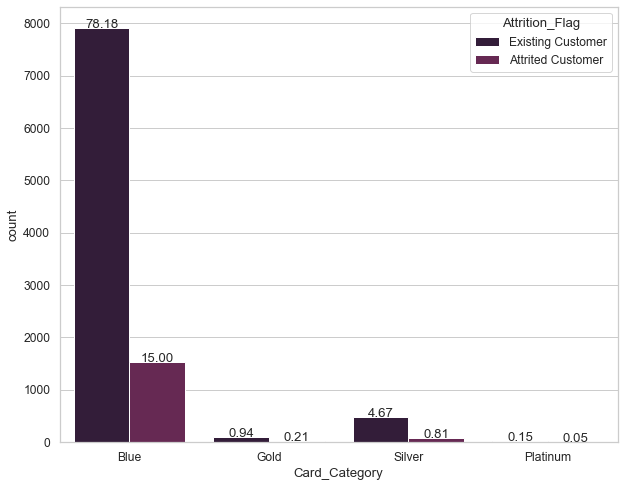

In [35]:
plt.figure(figsize=(10,8))
total = float(len(df["Attrition_Flag"]) )

ax = sns.countplot(x='Card_Category', hue="Attrition_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [36]:
# contingency table
c_t = pd.crosstab(df['Card_Category'].sample(frac=0.01, replace=True, random_state=53),df['Attrition_Flag'].sample(frac=0.01, replace=True, random_state=53),margins = False) 
c_t

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,13,82
Gold,1,1
Silver,0,4


<h3>Hypothesis Test for relationship between education level and attrition</h3>

<p>Null Hypothesis - There is no relationship between card category and customer attrition</p>
<p>Alternative Hypothesis - There is no relationship between card category and customer attrition</p>

In [37]:
stat, p, dof, expected = chi2_contingency(c_t)
# print('dof=%d' % dof)
# print('p_value', p)
# print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent - Reject Null Hypothesis')
    print('Customer attrition depends on card category.')
else:
    print('Independent - Accept Null Hypothesis')
    print('Customer attrition does NOT depend on card category.')

probability=0.950, critical=5.991, stat=2.834
Independent - Accept Null Hypothesis
Customer attrition does NOT depend on card category.


<p>As we can see from the above categorical data columns we should not expect to create a tight model from this information.  We will do our best with the information available.</p>

<h1>Data Cleaning</h1>

<p>Next we must construct our data matrix, $X$ from our 5 categorical and 13 numerical columns.  Our categorical data will be hot encoded into our feature matrix $X$, and will have 22 columns.  The remaining 13 numerical columns that pertain to credit card use data that has been compiled.  I will remove the column labeled 'Avg_Open_To_Buy' for the reasons outlined above.  The last two columns are from somebody elses work who created this dataset, I will remove them as well.  The data is very clean otherwise and requires very little processing.  In the end we have a feature matrix with 35 columns and 10,127 rows for data entries.</p>

In [38]:
df = df.drop(['Avg_Open_To_Buy'],axis=1)
# print('Skipped')

In [39]:
cols = df.describe().columns
cols = cols.tolist()
dfx = df[cols[1:-2]]
X_num = dfx.to_numpy()
# print(X_num.shape)

# Gender, categorical
df_gender = pd.get_dummies(df['Gender'])
genF = df_gender['F'].to_numpy()
Xf = np.append(X_num,genF.reshape((10127,1)),axis=1)
# print(genF.shape)

# Education, categorical
df_edu = pd.get_dummies(df['Education_Level'])
edu = df_edu.to_numpy()
# print(edu.shape)
Xed = np.append(Xf,edu,axis=1)
# print(edu.shape)

# Marriage, categorical
mar = df['Marital_Status'].unique()
df_mar = pd.get_dummies(df['Marital_Status'])
mar = df_mar.to_numpy()
Xmar = np.append(Xed,mar,axis=1)
# print(mar.shape)

# Income, categorical
inc = df['Income_Category'].unique()
df_inc = pd.get_dummies(df['Income_Category'])
df_inc.head()
inc = df_inc.to_numpy()
Xinc = np.append(Xmar,inc,axis=1)
# print(inc.shape)

# Card Category, categorical
cc = df['Card_Category'].unique()
df_cc = pd.get_dummies(df['Card_Category'])
df_cc.tail()
cc = df_cc.to_numpy()
Xcc = np.append(Xinc,cc,axis=1)
# print(cc.shape)

X = Xcc

<h1>Predictive Models</h1>

<p>I will go through a few different models and tune them to try and get a good prediction algorithm.  The scoring method will be to optimize recall on the attrited customers.  We want to minimize the true negatives in our confusion matrix.  This will attempt to reach every customer with an incentive who is likely to churn.  This is the best scoring system because we can accept offering perks to some existing customers but also want to minim ize churn.</p>

In [40]:
def custom_recall_score(y_test, y_pred):
    return metrics.recall_score(y_test,y_pred, average=None)[0]

c_score = make_scorer(custom_recall_score)

<p>Our preprocessing involves splitting our data entries into test and train sets.  Then we must transfom this to standardize the mean and variance.  This is to ensure one column does not dominate the model since its mean is very high compared to other columns.</p>

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=53)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<h3>First Model is the Logistic Regression - 55<h3>

In [42]:
logreg = LogisticRegression(random_state=53)
y_pred = logreg.fit(X_train,y_train).predict(X_test)

print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.5537757437070938


<h3>Second Model is the Tuned Logistic Regression - 56<h3>

In [43]:
parameters = {
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

clf = GridSearchCV(logreg,
                   param_grid = parameters,
                   scoring=c_score,
                   verbose=0)

clf.fit(X_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Recall :",clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'solver': 'newton-cg'}
Recall : 0.5722689075630252


In [44]:
#logreg = LogisticRegression(C = 1.0, solver = 'lbfgs') # <---Defaults
logreg = LogisticRegression(C = 100.0, solver = 'newton-cg',random_state=53)
y_pred = logreg.fit(X_train,y_train).predict(X_test)
print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.5560640732265446


<h3>Third Model is the Naive Bayes Classifier - 55<h3>

In [45]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.5469107551487414


<h3>Fourth Model is the Tuned Naive Bayes Classifier - 55<h3>

In [46]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), 
                            param_grid=param_grid_nb, 
                            scoring=c_score,
                            verbose=0)

nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print("Recall :",nbModel_grid.best_score_)

GaussianNB(var_smoothing=0.005336699231206307)
Recall : 0.5899159663865546


In [47]:
#gnbh = GaussianNB(var_smoothing=0.000000001)  <--- Defaults
gnbh = GaussianNB(var_smoothing=0.005336699231206307)
y_pred = gnbh.fit(X_train, y_train).predict(X_test)

print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.5469107551487414


<h3>Fifth Model is the Random Forest Classifier - 69<h3>

In [48]:
clf = RandomForestClassifier(max_depth=8, random_state=53)
clf.fit(X_train, y_train) #< fit on the train, predict on the test
y_pred = clf.predict(X_test)
print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.6270022883295194


<h3>Sixth Model is the Tuned Random Forest Classifier - 77, 63<h3>

<p>I have employed two methods to tune this model.  The first is a grid search of parameters.  This tests a set of parameters exhaustively.  This is time consuming which is why I did the second.  This is the largest range of parameters I would choose for this because of the long runtime to exhaust all posibilities.  The second method is random search which can take more parameters but does not systematically test each one.  This search runs fast and we hope to find an acceptable parameter solution in much less time than the gridsearch method.</p>

In [49]:
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'max_features': ['auto', 3],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2, 8],
    'n_estimators': [100, 1000]
}

#  This takes 10 minutes
rf_model_grid = GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid=param_grid_rf, 
                            scoring=c_score,
                            verbose=0)
rf_model_grid.fit(X_train, y_train)
print(rf_model_grid.best_estimator_)
print("Recall :",rf_model_grid.best_score_)

RandomForestClassifier(max_depth=80)
Recall : 0.7588235294117647


In [50]:
clf_h = RandomForestClassifier(max_depth=80, random_state=53)
y_pred = clf_h.fit(X_train, y_train).predict(X_test)
print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.7734553775743707


In [51]:
param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5, 8],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

n_iter_search = 10
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_dist,
                                   scoring=c_score,
                                   verbose=0,
                                   n_iter=n_iter_search)

rf_random_search.fit(X_train, y_train)
print(rf_random_search.best_estimator_)
print("Recall :",rf_random_search.best_score_)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=1000)
Recall : 0.622689075630252


In [53]:
clf_h = RandomForestClassifier(max_depth=100,
                               max_features=3,
                               min_samples_leaf=2,
                               min_samples_split=8,
                               n_estimators=1000,
                               random_state=53)
y_pred = clf_h.fit(X_train, y_train).predict(X_test)

print("Recall:",metrics.recall_score(y_test,y_pred, average=None)[0])

Recall: 0.6270022883295194


<h2>Conclusion</h2>

<p>Our findings here show that our most accurate model will be the random forest tuned using the grid search technique.  I would suggest this is the best method to solve our problem even though it has a relatively long run time.  For this problem we would only need to run it once to implement our solution.  If runtime were a factor in our decision I would go with the fifth model, standard random forest.  It runs fast and gives a more accurate score on the test set than any of the others.  What have we learned to improve this model?  First of all we know than generic demographic information was not helpful in our prediction.  The best predictor column was number of accounts.  If we were to get more data it should pertain to customer relationship features.  Maybe customer satisfaction with service polling.  This model does show which customers may attrite and what factors contribute for future business decisions.</p>